# Bereinigten Datensatz einlesen

In [1]:
import pandas
t = pandas.read_csv("data_cars_cleaned.csv")
t.head(3)

,brand,model,color,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,registration_month,registration_year
0,alfa-romeo,Alfa Romeo GTV,red,1300.0,148,201,Manual,Petrol,10.9,260.0,160500.0,10,1995
1,alfa-romeo,Alfa Romeo Spider,black,4900.0,110,150,Manual,Petrol,9.5,225.0,189500.0,7,1995
2,alfa-romeo,Alfa Romeo Spider,red,7900.0,110,150,Manual,Petrol,9.5,225.0,47307.0,4,1996


In [2]:
t.shape

(162521, 13)

In [3]:
t.sample(frac=0.1)

,brand,model,color,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,registration_month,registration_year
32149,fiat,Fiat 500,grey,15500.0,51,69,Automatic,Petrol,5.2,120.0,12228.0,3,2019
64031,mazda,Mazda 2,white,20488.0,68,92,Automatic,Hybrid,3.8,87.0,10.0,5,2023
37886,ford,Ford Mondeo,black,12000.0,132,179,Automatic,Diesel,4.9,126.0,177000.0,11,2015
20584,bmw,BMW 218,white,21400.0,100,136,Manual,Petrol,5.5,129.0,62358.0,4,2016
120476,seat,SEAT Ateca,white,29395.0,110,150,Manual,Petrol,6.3,142.0,10.0,4,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58096,kia,Kia Picanto,yellow,13990.0,49,67,Automatic,Petrol,5.5,125.0,50.0,6,2023
21261,bmw,BMW 320,black,18999.0,140,190,Automatic,Diesel,4.7,124.0,141000.0,2,2017
12277,audi,Audi Q5,white,30880.0,140,190,Manual,Diesel,5.8,153.0,75500.0,3,2020
120898,skoda,Skoda Fabia,beige,4500.0,51,69,Manual,Petrol,5.9,140.0,73000.0,2,2009


In [4]:
t["brand"].unique()

array(['alfa-romeo', 'aston-martin', 'audi', 'bentley', 'bmw', 'cadillac',
       'chevrolet', 'chrysler', 'citroen', 'dacia', 'daewoo', 'daihatsu',
       'dodge', 'fiat', 'ford', 'honda', 'hyundai', 'infiniti', 'isuzu',
       'jaguar', 'jeep', 'kia', 'lada', 'lancia', 'land-rover',
       'maserati', 'mazda', 'mercedes-benz', 'mini', 'mitsubishi',
       'nissan', 'opel', 'peugeot', 'porsche', 'renault', 'rover', 'saab',
       'seat', 'skoda', 'smart', 'ssangyong', 'toyota', 'volkswagen',
       'volvo'], dtype=object)

# Codierung kategorialer Werte

## Trockenübung zum Thema One-Hot-Encoding

In [5]:
d = {"Kundennr" : [101,20993,330,4440],
     "Alter"    : [39, 23,   40, 19],
     "Lieblingsfarbe" : ["rot", "grün", "rot", "blau"]}
t2 = pandas.DataFrame(d)
t2

,Kundennr,Alter,Lieblingsfarbe
0,101,39,rot
1,20993,23,grün
2,330,40,rot
3,4440,19,blau


In [6]:
t2["Lieblingsfarbe"].unique()

array(['rot', 'grün', 'blau'], dtype=object)

In [7]:
pandas.get_dummies(t2)

,Kundennr,Alter,Lieblingsfarbe_blau,Lieblingsfarbe_grün,Lieblingsfarbe_rot
0,101,39,False,False,True
1,20993,23,False,True,False
2,330,40,False,False,True
3,4440,19,True,False,False


In [8]:
pandas.__version__

'2.1.2'

## One-Hot-Encoding für unsere Tabelle

In [9]:
t.columns

Index(['brand', 'model', 'color', 'price_in_euro', 'power_kw', 'power_ps',
       'transmission_type', 'fuel_type', 'fuel_consumption_l_100km',
       'fuel_consumption_g_km', 'mileage_in_km', 'registration_month',
       'registration_year'],
      dtype='object')

In [10]:
t = pandas.get_dummies(t)

In [11]:
t

,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,registration_month,registration_year,brand_alfa-romeo,brand_aston-martin,...,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Electric,fuel_type_Ethanol,fuel_type_Hybrid,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Other,fuel_type_Petrol,fuel_type_Unknown
0,1300.0,148,201,10.9,260.0,160500.0,10,1995,True,False,...,False,False,False,False,False,False,False,False,True,False
1,4900.0,110,150,9.5,225.0,189500.0,7,1995,True,False,...,False,False,False,False,False,False,False,False,True,False
2,7900.0,110,150,9.5,225.0,47307.0,4,1996,True,False,...,False,False,False,False,False,False,False,False,True,False
3,5500.0,132,179,13.4,320.0,168000.0,7,1996,True,False,...,False,False,False,False,False,False,False,False,True,False
4,6976.0,110,150,9.2,220.0,99000.0,1,1996,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162516,37900.0,120,163,6.6,166.0,2145.0,2,2023,False,False,...,False,False,False,False,False,False,False,False,True,False
162517,59890.0,145,197,5.5,144.0,50.0,2,2023,False,False,...,True,False,False,False,False,False,False,False,False,False
162518,37995.0,120,163,6.7,152.0,2100.0,3,2023,False,False,...,False,False,False,False,False,False,False,False,True,False
162519,55400.0,145,197,5.6,142.0,5000.0,5,2023,False,False,...,True,False,False,False,False,False,False,False,False,False


# Daten fürs ML vorbereiten

## Input-/Output-Split

In [12]:
x = t.drop("price_in_euro", axis="columns")
x

,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,registration_month,registration_year,brand_alfa-romeo,brand_aston-martin,brand_audi,...,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Electric,fuel_type_Ethanol,fuel_type_Hybrid,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Other,fuel_type_Petrol,fuel_type_Unknown
0,148,201,10.9,260.0,160500.0,10,1995,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,110,150,9.5,225.0,189500.0,7,1995,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,110,150,9.5,225.0,47307.0,4,1996,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,132,179,13.4,320.0,168000.0,7,1996,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,110,150,9.2,220.0,99000.0,1,1996,True,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162516,120,163,6.6,166.0,2145.0,2,2023,False,False,False,...,False,False,False,False,False,False,False,False,True,False
162517,145,197,5.5,144.0,50.0,2,2023,False,False,False,...,True,False,False,False,False,False,False,False,False,False
162518,120,163,6.7,152.0,2100.0,3,2023,False,False,False,...,False,False,False,False,False,False,False,False,True,False
162519,145,197,5.6,142.0,5000.0,5,2023,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [13]:
type(x)

pandas.core.frame.DataFrame

In [14]:
y = t[  ["price_in_euro"]  ]

In [15]:
type(y)

pandas.core.frame.DataFrame

In [16]:
y

,price_in_euro
0,1300.0
1,4900.0
2,7900.0
3,5500.0
4,6976.0
...,...
162516,37900.0
162517,59890.0
162518,37995.0
162519,55400.0


## Train-/Test-Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [19]:
x_train.shape

(130016, 1125)

In [20]:
x_test.shape

(32505, 1125)

In [21]:
x.shape[0] * 0.8

130016.8

In [22]:
x.shape[0] * 0.2

32504.2

In [23]:
y_train.shape

(130016, 1)

In [24]:
# Ground Truth / Grundwahrheit
y_test.shape

(32505, 1)

In [25]:
x_test["power_ps"].describe()

count    32505.000000
mean       155.487648
std         70.066085
min         45.000000
25%        110.000000
50%        143.000000
75%        184.000000
max        810.000000
Name: power_ps, dtype: float64

In [26]:
x_test["mileage_in_km"].describe()

count     32505.000000
mean      73833.845101
std       58494.958005
min           0.000000
25%       24129.000000
50%       63650.000000
75%      114273.000000
max      224980.000000
Name: mileage_in_km, dtype: float64

## Standardisierung der Merkmale

In [27]:
from sklearn.preprocessing import StandardScaler

scaler_input = StandardScaler()
scaler_output = StandardScaler()

x_train_scaled = scaler_input.fit_transform(x_train)
y_train_scaled = scaler_output.fit_transform(y_train)

x_test_scaled = scaler_input.transform(x_test)
y_test_scaled = scaler_output.transform(y_test)

In [28]:
x_train.iloc[0].values

array([96, 131, 5.1, ..., False, True, False], dtype=object)

In [29]:
x_train_scaled[0]

array([-0.35166338, -0.34626689, -0.42155908, ..., -0.01961418,
        0.7955341 , -0.011094  ])

In [30]:
len(x_train_scaled[0])

1125

In [31]:
y_train.iloc[0].values

array([18880.])

In [32]:
y_train_scaled[0]

array([-0.22568933])

### Überprüfung, ob die Skalierung funktioniert hat

In [33]:
x_train_scaled

array([[-0.35166338, -0.34626689, -0.42155908, ..., -0.01961418,
         0.7955341 , -0.011094  ],
       [-0.27462726, -0.27541329, -0.35978959, ..., -0.01961418,
        -1.25701714, -0.011094  ],
       [-1.21831983, -1.22485152, -0.54509805, ..., -0.01961418,
         0.7955341 , -0.011094  ],
       ...,
       [-0.64054886, -0.643852  , -0.792176  , ..., -0.01961418,
         0.7955341 , -0.011094  ],
       [ 0.88091467,  0.88658575,  2.04922042, ..., -0.01961418,
         0.7955341 , -0.011094  ],
       [-0.64054886, -0.643852  , -0.54509805, ..., -0.01961418,
         0.7955341 , -0.011094  ]])

In [34]:
x_train_scaled.shape

(130016, 1125)

In [35]:
x_train_scaled.ndim

2

In [36]:
x_train_scaled[:,0].mean()

-2.513918736537396e-17

In [37]:
x_train_scaled[:,0].var()

1.0000000000000002

In [38]:
x_train_scaled[:,0].std()

1.0

## NumPy-Arrays in PyTorch Tensoren umwandeln

In [39]:
import torch

x_train_scaled_tensor = torch.FloatTensor(x_train_scaled)
y_train_scaled_tensor = torch.FloatTensor(y_train_scaled)

x_test_scaled_tensor = torch.FloatTensor(x_test_scaled)
y_test_scaled_tensor = torch.FloatTensor(y_test_scaled)

In [40]:
type(x_train_scaled)

numpy.ndarray

In [41]:
type(x_train_scaled_tensor)

torch.Tensor

In [42]:
x_train_scaled.shape

(130016, 1125)

In [43]:
x_train_scaled_tensor.shape

torch.Size([130016, 1125])

In [44]:
x_train_scaled

array([[-0.35166338, -0.34626689, -0.42155908, ..., -0.01961418,
         0.7955341 , -0.011094  ],
       [-0.27462726, -0.27541329, -0.35978959, ..., -0.01961418,
        -1.25701714, -0.011094  ],
       [-1.21831983, -1.22485152, -0.54509805, ..., -0.01961418,
         0.7955341 , -0.011094  ],
       ...,
       [-0.64054886, -0.643852  , -0.792176  , ..., -0.01961418,
         0.7955341 , -0.011094  ],
       [ 0.88091467,  0.88658575,  2.04922042, ..., -0.01961418,
         0.7955341 , -0.011094  ],
       [-0.64054886, -0.643852  , -0.54509805, ..., -0.01961418,
         0.7955341 , -0.011094  ]])

In [45]:
x_train_scaled_tensor

tensor([[-0.3517, -0.3463, -0.4216,  ..., -0.0196,  0.7955, -0.0111],
        [-0.2746, -0.2754, -0.3598,  ..., -0.0196, -1.2570, -0.0111],
        [-1.2183, -1.2249, -0.5451,  ..., -0.0196,  0.7955, -0.0111],
        ...,
        [-0.6405, -0.6439, -0.7922,  ..., -0.0196,  0.7955, -0.0111],
        [ 0.8809,  0.8866,  2.0492,  ..., -0.0196,  0.7955, -0.0111],
        [-0.6405, -0.6439, -0.5451,  ..., -0.0196,  0.7955, -0.0111]])

# Ein MLP mit PyTorch definieren

In [46]:
!pip show torch

Name: torch
Version: 2.1.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /home/juebrauer/miniconda3/envs/env_ws23/lib/python3.11/site-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: torchvision


In [47]:
import torch.nn as nn

class MLP(nn.Module):

    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()

        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.layers(x)

In [48]:
import numpy
num_features = 1125
k = 1/num_features
(-numpy.sqrt(k), +numpy.sqrt(k))

(-0.029814239699997195, 0.029814239699997195)

In [49]:
y_train.shape

(130016, 1)

In [50]:
input_dim = x_train.shape[1]
output_dim = y_train.shape[1]
model = MLP(input_dim, output_dim)

In [51]:
model

MLP(
  (layers): Sequential(
    (0): Linear(in_features=1125, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)

# MLP trainieren

In [52]:
for p in model.parameters():
    print(p.shape)

torch.Size([64, 1125])
torch.Size([64])
torch.Size([128, 64])
torch.Size([128])
torch.Size([64, 128])
torch.Size([64])
torch.Size([1, 64])
torch.Size([1])


Epoch 5: loss=0.15686358511447906
Epoch 10: loss=0.1349359154701233
Epoch 15: loss=0.12645117938518524
Epoch 20: loss=0.12113605439662933
Epoch 25: loss=0.11670996993780136
Epoch 30: loss=0.11221207678318024
Epoch 35: loss=0.10900107026100159
Epoch 40: loss=0.10692786425352097
Epoch 45: loss=0.10440332442522049
Epoch 50: loss=0.1026858538389206


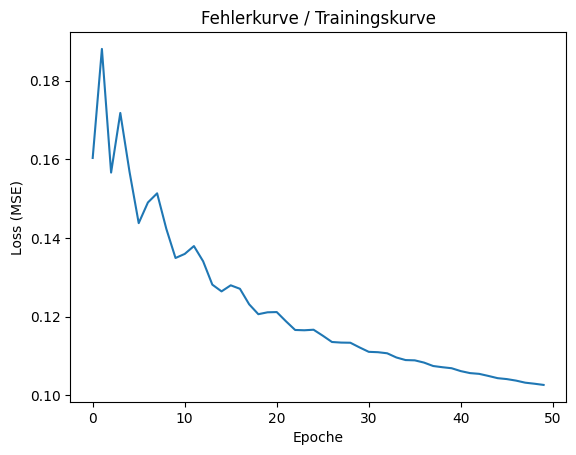

In [93]:
import torch.optim as optim

# Hyperparameter
learning_rate = 0.001
epochs = 50

model = MLP(input_dim, output_dim)
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

model.train()

losses = []

for epoch in range(1,epochs+1):

    optimizer.zero_grad()

    outputs = model(x_train_scaled_tensor)

    l = loss(outputs, y_train_scaled_tensor)

    l.backward()
    optimizer.step()

    if epoch % 5 == 0:
        print(f"Epoch {epoch}: loss={l.item()}")

    losses.append( l.item() )

import matplotlib.pyplot as plt
plt.plot( losses )
plt.xlabel("Epoche")
plt.ylabel("Loss (MSE)")
plt.title("Fehlerkurve / Trainingskurve")
plt.show()

In [54]:
type(x_train)

pandas.core.frame.DataFrame

# MLP anwenden

In [55]:
example_tensor = x_test_scaled_tensor[0]
example_tensor

tensor([-0.4672, -0.4738, -0.5451,  ..., -0.0196, -1.2570, -0.0111])

In [56]:
model.eval()
with torch.no_grad():
    preds = model(example_tensor)

In [57]:
preds

tensor([0.8414])

In [58]:
preds.reshape(1,1)

tensor([[0.8414]])

In [59]:
scaler_output.inverse_transform(preds.reshape(1,1))

array([[31830.78088977]])

In [60]:
y_test_scaled[0]

array([0.45975436])

In [61]:
scaler_output.inverse_transform(y_test_scaled[0].reshape(1,1))

array([[27199.]])

In [62]:
y_test_scaled_tensor.shape

torch.Size([32505, 1])

# Modellgüte bestimmen

In [94]:
model.eval()
with torch.no_grad():
    preds = model(x_test_scaled_tensor)
preds

tensor([[ 1.0243],
        [ 0.0828],
        [ 0.9317],
        ...,
        [-0.2796],
        [ 1.3590],
        [-0.5920]])

In [95]:
preds.shape

torch.Size([32505, 1])

In [96]:
preds_euro = scaler_output.inverse_transform( preds )
preds_euro

array([[34050.94947922],
       [22623.68351258],
       [32926.60259927],
       ...,
       [18225.67689956],
       [38112.4557274 ],
       [14433.93975391]])

In [97]:
gt_euro = scaler_output.inverse_transform( y_test_scaled_tensor )
gt_euro

array([[27198.99982751],
       [17499.99987651],
       [29848.00014036],
       ...,
       [16498.99983544],
       [38190.00003459],
       [13450.00005361]])

## Mean Absolut Error (MAE)

In [98]:
abs(preds_euro - gt_euro)

array([[6851.94965172],
       [5123.68363607],
       [3078.60245891],
       ...,
       [1726.67706412],
       [  77.54430719],
       [ 983.9397003 ]])

In [99]:
import numpy
numpy.mean(abs(preds_euro - gt_euro))

2473.4710555605047

In [100]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(gt_euro, preds_euro)

2473.4710555605047

## Ein anderes Fehlermaß: MAPE

In [101]:
6000 - 5000

1000

In [102]:
60000 - 59000

1000

In [103]:
(6000 - 5000)/5000

0.2

In [104]:
(60000 - 59000)/59000

0.01694915254237288

In [105]:
import numpy
numpy.mean(abs(preds_euro - gt_euro) / gt_euro)

0.1445483378363725

In [106]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(gt_euro, preds_euro)

0.1445483378363725

# Vergleich der MLP-Leistung mit Baseline

## Rate-Strategie

In [78]:
mittlerer_verkaufspreis = y_train["price_in_euro"].median()
mittlerer_verkaufspreis

19888.0

### MAE

In [79]:
import numpy
numpy.mean(abs(mittlerer_verkaufspreis - gt_euro))

9477.809285249416

### MAPE

In [80]:
import numpy
numpy.mean(abs(mittlerer_verkaufspreis - gt_euro) / gt_euro)

0.8039122439612252

In [81]:
werte = [10, 300, 40, 30, 49900, 600, 2]

In [82]:
numpy.mean(werte)

7268.857142857143

In [83]:
numpy.median(werte)

40.0

In [84]:
sorted(werte)

[2, 10, 30, 40, 300, 600, 49900]

# Alles in einer Codezelle

In [ ]:
# 1. Bereinigten Datensatz einlesen
import pandas
t = pandas.read_csv("data_cars_cleaned.csv")

# 2. Codierung kategorialer Merkmale
t = pandas.get_dummies(t)

# 3. Input-/Output-Split
x = t.drop("price_in_euro", axis="columns")
y = t[  ["price_in_euro"]  ]

# 4. Train-/Test-Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

# 5. Skalierung der Daten
scale_data = True
if scale_data:
    from sklearn.preprocessing import StandardScaler
    scaler_input = StandardScaler()
    scaler_output = StandardScaler()
    x_train = scaler_input.fit_transform(x_train)
    y_train = scaler_output.fit_transform(y_train)
    x_test = scaler_input.transform(x_test)
    y_test = scaler_output.transform(y_test)
else:
    x_train = x_train.to_numpy().astype(float)
    y_train = y_train.to_numpy().astype(float)
    x_test  = x_test.to_numpy().astype(float)
    y_test  = y_test.to_numpy().astype(float)

# 6. NumPy-Arrays --> PyTorch Tensoren umwandeln
import torch
x_train_tensor = torch.FloatTensor(x_train)
y_train_tensor = torch.FloatTensor(y_train)
x_test_tensor = torch.FloatTensor(x_test)
y_test_tensor = torch.FloatTensor(y_test)



def train_MLP(epochs, model, x_train_tensor, y_train_tensor):
    import torch.optim as optim    
    learning_rate = 0.001
    loss = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)    
    model.train()    
    losses = []    
    for epoch in range(1,epochs+1):    
        optimizer.zero_grad()    
        outputs = model(x_train_tensor)    
        l = loss(outputs, y_train_tensor)    
        l.backward()
        optimizer.step()    
        if epoch % 5 == 0:
            print(f"Epoch {epoch}: loss={l.item()}")    
        losses.append( l.item() )
    
    import matplotlib.pyplot as plt
    plt.plot( losses )
    plt.xlabel("Epoche")
    plt.ylabel("Loss (MSE)")
    plt.title("Fehlerkurve / Trainingskurve")
    plt.show()

# 7. Modell erstellen und trainieren
models_to_train = 1
MAPEs = []
for model_nr in range(models_to_train):
    print(f"Training model {model_nr}...")
    input_dim = x_train.shape[1]
    output_dim = y_train.shape[1]
    model = MLP(input_dim, output_dim)
    train_MLP(100, model, x_train_tensor, y_train_tensor)
    
    # 8. Modellgüte bestimmen
    model.eval()
    with torch.no_grad():
        preds = model(x_test_tensor)
    if scale_data:
        preds = scaler_output.inverse_transform( preds )
        gt = scaler_output.inverse_transform( y_test_tensor )
    else:
        gt = y_test_tensor
    from sklearn.metrics import mean_absolute_percentage_error
    MAPE = mean_absolute_percentage_error(gt, preds)
    print(f"MAPE = {MAPE*100.0:.2f}")
    MAPEs.append(round(MAPE*100.0,0))

import matplotlib.pyplot as plt
plt.hist(MAPEs)
plt.show()

# 8. MLP mit Baseline vergleichen


# MLP mit Baselines vergleichen

## Multi-variate lineare Regression

In [9]:
# 1. Bereinigten Datensatz einlesen
import pandas
t = pandas.read_csv("data_cars_cleaned.csv")

# 2. Codierung kategorialer Merkmale
t = pandas.get_dummies(t)

# 3. Input-/Output-Split
x = t.drop("price_in_euro", axis="columns")
y = t[  ["price_in_euro"]  ]

# 4. Train-/Test-Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

# 5. Erzeuge ein lineares Modell und trainiere es auf den Trainingsdaten
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr = lr.fit(x_train, y_train)

$verkaufspreis = a_0 + a_1*x_1 + a_2*x_2 + ... + a_{1125}*x_{1125}$

$dauer = b_0 + b_1*x_1 + b_2*x_2 + ... + b_{1125}*x_{1125}$

$f: R \rightarrow R$

$f: R^n \rightarrow R$

$f: R^n \rightarrow R^m$

In [8]:
x_train.shape

(130016, 1125)

In [10]:
y_train.shape

(130016, 1)

In [11]:
lr.intercept_

array([-1969888.6569847])

In [12]:
lr.coef_

array([[   81.26842273,    -9.28914342,   117.08786352, ...,
         1668.5840121 , -1543.74436794, -1329.42619095]])

In [14]:
len(lr.coef_.flatten())

1125

In [27]:
preds = lr.predict(x_test)
preds = preds.flatten()
preds.shape

gt = y_test.values.flatten()
gt.shape

from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(gt, preds)
print(f"MAPE = {MAPE*100.0:.2f}")

MAPE = 24.73


## Decision Trees

In [30]:
from sklearn import tree
dtreg = tree.DecisionTreeRegressor()
dtreg = dtreg.fit(x_train, y_train)

In [31]:
preds = dtreg.predict(x_test)
preds = preds.flatten()
preds.shape

gt = y_test.values.flatten()
gt.shape

from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(gt, preds)
print(f"MAPE = {MAPE*100.0:.2f}")

MAPE = 18.31


## Random Forests

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators=5)
rfreg = rfreg.fit(x_train, y_train)

/home/juebrauer/miniconda3/envs/env_ws23/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [34]:
preds = rfreg.predict(x_test)
preds = preds.flatten()
preds.shape

gt = y_test.values.flatten()
gt.shape

from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(gt, preds)
print(f"MAPE = {MAPE*100.0:.2f}")

MAPE = 15.07


In [42]:
print(rfreg)

RandomForestRegressor(n_estimators=5)


## Mehrere Vergleichsmodelle durchlaufen lassen

In [12]:
import datetime
datetime.datetime.now()

datetime.datetime(2023, 11, 15, 13, 17, 54, 954224)

In [13]:
# 1. Bereinigten Datensatz einlesen
import pandas
t = pandas.read_csv("data_cars_cleaned.csv")

# 2. Codierung kategorialer Merkmale
t = pandas.get_dummies(t)

demo = False
if demo:
    t = t.sample(frac=0.1)

# 3. Input-/Output-Split
x = t.drop("price_in_euro", axis="columns")
y = t[  ["price_in_euro"]  ]

# 4. Train-/Test-Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)


from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error

models = [linear_model.LinearRegression(),
          tree.DecisionTreeRegressor(),
          RandomForestRegressor(n_estimators=5),
          GradientBoostingRegressor()
         ]

import datetime
start = datetime.datetime.now()

for model in models:    
    model = model.fit(x_train, y_train.values.flatten())
    preds = model.predict(x_test).flatten()        
    gt = y_test.values.flatten()
    MAPE = mean_absolute_percentage_error(gt, preds)
    print(f"Model: {model} --> MAPE = {MAPE*100.0:.2f}")

stop = datetime.datetime.now()
print("start=", start)
print("stop=", stop)

Model: LinearRegression() --> MAPE = 23.89
Model: DecisionTreeRegressor() --> MAPE = 18.46
Model: RandomForestRegressor(n_estimators=5) --> MAPE = 15.22
Model: GradientBoostingRegressor() --> MAPE = 18.57
start= 2023-11-15 13:18:38.875641
stop= 2023-11-15 13:22:53.729379


In [4]:
y_train.values.flatten()

array([32990.,  7924., 36875., ..., 51490., 21950., 33877.])